# Gender Identification Modeling 

This kernel is the content from Chapter 6.1.1 to 6.1.2 of the NLTK book.

In Chapter 4 of the NLTK book, we saw that male and female names have some distinctive characteristics. Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male. Let's build a classifier to model these differences more precisely.

The first step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. For this example, we'll start by just looking at the final letter of a given name. The following feature extractor function builds a dictionary containing relevant information about a given name:

In [8]:
#If uploading data through google drive, use the following to mount then access data in next cell:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
male_text = open('/content/drive/My Drive/MIDS_Yr2/IDS_690_NLP/Text_Data/names/male.txt', 'r').read()

female_text = open('/content/drive/My Drive/MIDS_Yr2/IDS_690_NLP/Text_Data/names/female.txt', 'r').read()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/MIDS_Yr2/IDS_690_NLP/Text_Data/names/male.txt'

In [1]:
#For local Jupyter Notebook, input data with the following code:

male_text = open('/Users/dannywitt/nltk_data/corpora/names/male.txt', 'r').read()

female_text = open('/Users/dannywitt/nltk_data/corpora/names/female.txt', 'r').read()

The returned **dictionary, known as a feature set, maps from feature names to their values.** 

Feature names are case-sensitive strings that typically provide a short human-readable description of the feature, as in the example 'last_letter'. Feature values are values with simple types, such as booleans, numbers, and strings.

Note:

Most classification methods require that features be encoded using simple value types, such as booleans, numbers, and strings. But note that just because a feature has a simple type, this does not necessarily mean that the feature's value is simple to express or compute. Indeed, it is even possible to use very complex and informative values, such as the output of a second supervised classifier, as features.

Now that we've defined a feature extractor, we need to prepare a list of examples and corresponding class labels.

In [2]:
#Prepare raw data value, class labels and output as list of tuples (name, sex):

import random

# Read the names from the files.
# Label each name with the corresponding gender.
male_names = [(name, 'male') for name in male_text.split('\n')]
female_names = [(name, 'female') for name in female_text.split('\n')]

# Combine the lists:
labeled_names = male_names + female_names

# Shuffle the list:
random.shuffle(labeled_names)

In [3]:
#Remove 'names' that are actually spaces: ' ':

labeled_names.remove(('', 'male'))
labeled_names.remove(('', 'female'))

In [4]:
#Check to see if cleaned:
for name in labeled_names:
    if len(name[0]) > 0:
        a = False
        pass
    else:
        a = True
        print(name)
if a is True:
    print('Not Cleaned.')
    pass
elif a is False:
    print('Cleaned!')
    pass
        

Cleaned!


Next, we use the feature extractor to process the names data, and divide the resulting list of feature sets into a training set and a test set The training set is used to train a Naive Bayes classifier.

In [5]:
#To start, use feature of the last letter in each name:

def gender_features(word):
    return {'last_letter': word[-1]}

#Test to make sure it works:
gender_features('Robby')

{'last_letter': 'y'}

In [6]:
from nltk import NaiveBayesClassifier

# Extract the features using the `gender_features()` function.
featuresets = [(gender_features(name), gender) for (name, gender) in labeled_names]

# Split the dataset into train and test set.
train_set, test_set = featuresets[500:], featuresets[:500]

# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

Test it out on names not in the set:

In [8]:
neo_gender = classifier.classify(gender_features('Neo'))
trinity_gender = classifier.classify(gender_features('Trinity'))
print("Neo is most probably a {}.".format(neo_gender))
print("Trinity is most probably a {}.".format(trinity_gender))

Neo is most probably a male.
Trinity is most probably a female.


Observe that these character names from The Matrix are correctly classified. Although this science fiction movie is set in 2199, it still conforms with our expectations about names and genders. We can systematically evaluate the classifier on a much larger quantity of unseen data:

In [9]:
from nltk.classify import accuracy
print(accuracy(classifier, test_set))

0.768


Finally, we can examine the classifier to determine which features it found most effective for distinguishing the names' genders:

In [10]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'k'              male : female =     43.1 : 1.0
             last_letter = 'a'            female : male   =     34.2 : 1.0
             last_letter = 'f'              male : female =     15.9 : 1.0
             last_letter = 'p'              male : female =     11.9 : 1.0
             last_letter = 'm'              male : female =     10.7 : 1.0


This statistics from the training set shows that

names that end in "a" are female 35.7 times more often than they are male but
names that end in "k" are male 30.3 times more often than they are female.
These ratios are known as likelihood ratios, and can be useful for comparing different feature-outcome relationships.

Note:

Try modifying the gender_features() function to provide the classifier with features encoding the length of the name, its first letter, and any other features that seem like they might be informative. Retrain the classifier with these new features, and test its accuracy.

In [11]:
# For instance, instance of using the last character 
# in the name, we add a new feature that takes 
# the last 2 characters of the name and we
# redefine the `gender_features()` function.

def gender_features(word):
    return {'last_letter': word[-1], 
            'last_two_letters': word[-2:]}

gender_features('Shrek')


{'last_letter': 'k', 'last_two_letters': 'ek'}

When working with large corpora, constructing a single list that contains the features of every instance can use up a large amount of memory. In these cases, use the function nltk.classify.apply_features(), which returns an object that acts like a list but does not store all the feature sets in memory:

In [12]:
from nltk.classify import apply_features

# Instead of looping through a list comprehension as we have
# demonstrated above that returns a list. 
train_set_old = [(gender_features(n), gender) for (n, gender) in labeled_names[500:]]
test_set_old = [(gender_features(n), gender) for (n, gender) in labeled_names[:500]]

# We can simply use the `apply_features()` to return a generator instead.
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

type(train_set_old), type(train_set)

(list, nltk.collections.LazyMap)

In [13]:
# You can train a Naive Bayes classifier with either 
# `list` and `LazyMap` input, e.g.
classifier_old = NaiveBayesClassifier.train(train_set_old)
classifier = NaiveBayesClassifier.train(train_set)

# And we see that the accuracy is the same.
accuracy(classifier, test_set) == accuracy(classifier_old, test_set_old) 

True

## Try new feature permutations in same architecture:


In [14]:
#Other features:

def feature_1(name):
    return {'first_last': name[-1]}

feature_1('Toby')

{'first_last': 'y'}

In [15]:
from nltk.classify import apply_features

# Instead of looping through a list comprehension as we have
# demonstrated above that returns a list. 
train_set_old = [(gender_features(n), gender) for (n, gender) in labeled_names[500:]]
test_set_old = [(gender_features(n), gender) for (n, gender) in labeled_names[:500]]

# We can simply use the `apply_features()` to return a generator instead.
train_set = apply_features(feature_1, labeled_names[500:])
test_set = apply_features(feature_1, labeled_names[:500])

type(train_set_old), type(train_set)

(list, nltk.collections.LazyMap)

In [16]:
#You can train a Naive Bayes classifier with either `list` and `LazyMap` input, e.g.
classifier_old = NaiveBayesClassifier.train(train_set_old)
classifier = NaiveBayesClassifier.train(train_set)

# And we see WHETHER the accuracy is the same:
accuracy(classifier, test_set) == accuracy(classifier_old, test_set_old) 

False

In [17]:
#So, since False I will investigate why:

#Try random non-training names:

neo_gender = classifier.classify(feature_1('Jeff'))
trinity_gender = classifier.classify(feature_1('Susy'))
print("Jeff is most probably a {}.".format(neo_gender))
print("Susy is most probably a {}.".format(trinity_gender))

Jeff is most probably a male.
Susy is most probably a female.


In [18]:
#Generate model metrics:

from nltk.classify import accuracy
print(accuracy(classifier, test_set))

0.768


In [19]:
jess = 'jess'
jess[::-1]

'ssej'

## New Model Approach:

* turn names into n-grams 

* relate n-gram list to labeled "sex"

* Experiment with model types:

    * Naive Bayes Classifier
    * Neural Network w/ Keras

In [20]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

Using TensorFlow backend.


In [21]:
labeled_names_df = pd.DataFrame(labeled_names, columns =['Name', 'Sex'])

In [22]:
#OHE labels into binary (male = 1, female = 0):

labeled_names_df['Sex_label'] = np.where(labeled_names_df['Sex'] == 'male', 1, 0)

In [23]:
labeled_names_df["Name"] = labeled_names_df["Name"].apply(lambda x: ' '.join(list(x)))
labeled_names_df

,Name,Sex,Sex_label
0,C l e m e n s,male,1
1,A l e x,female,0
2,R a v i,male,1
3,L a w t o n,male,1
4,D a r r e l,male,1
5,T o m e,male,1
6,F r a n c i s c a,female,0
7,R o z e l l a,female,0
8,K i t,male,1
9,F r i e d r i c,male,1


In [24]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

labeled_names_df["tokens"] = labeled_names_df["Name"].apply(tokenizer.tokenize)
labeled_names_df

,Name,Sex,Sex_label,tokens
0,C l e m e n s,male,1,"[C, l, e, m, e, n, s]"
1,A l e x,female,0,"[A, l, e, x]"
2,R a v i,male,1,"[R, a, v, i]"
3,L a w t o n,male,1,"[L, a, w, t, o, n]"
4,D a r r e l,male,1,"[D, a, r, r, e, l]"
5,T o m e,male,1,"[T, o, m, e]"
6,F r a n c i s c a,female,0,"[F, r, a, n, c, i, s, c, a]"
7,R o z e l l a,female,0,"[R, o, z, e, l, l, a]"
8,K i t,male,1,"[K, i, t]"
9,F r i e d r i c,male,1,"[F, r, i, e, d, r, i, c]"


In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in labeled_names_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in labeled_names_df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

47885 words total, with a vocabulary size of 52
Max sentence length is 14


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer(analyzer='char')

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = labeled_names_df["Name"].tolist()
list_labels = labeled_names_df["Sex_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

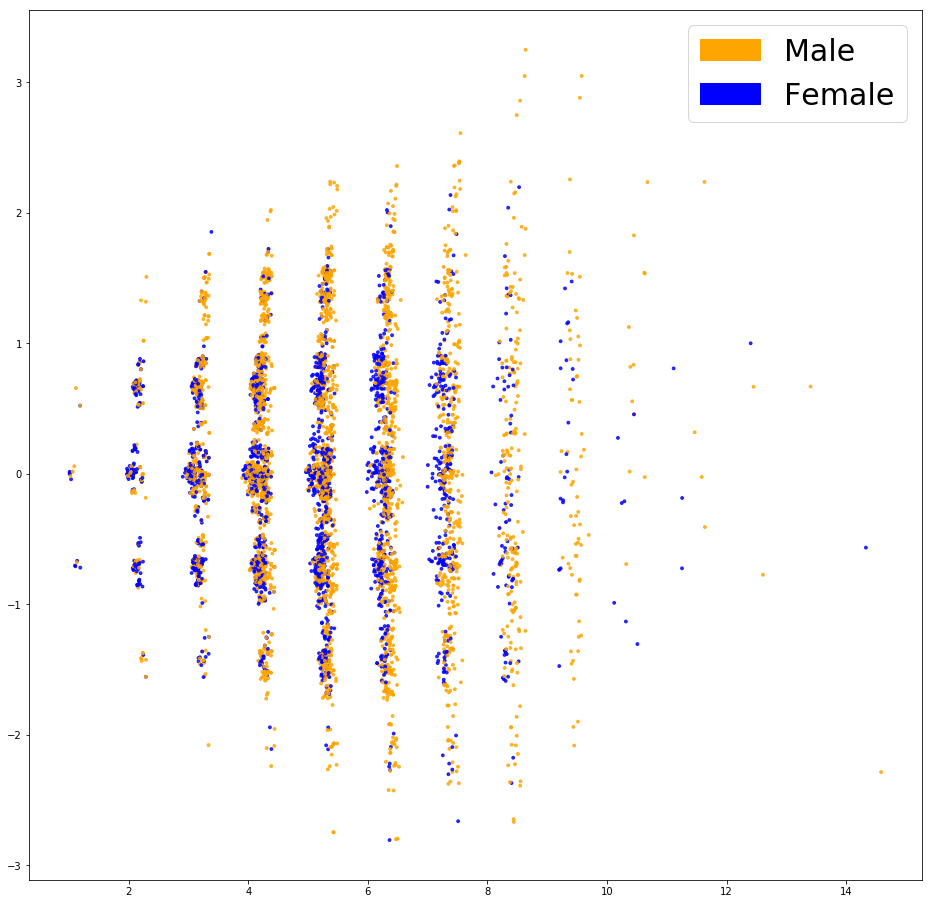

In [28]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Male')
            green_patch = mpatches.Patch(color='blue', label='Female')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.738, precision = 0.732, recall = 0.738, f1 = 0.728


In [31]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

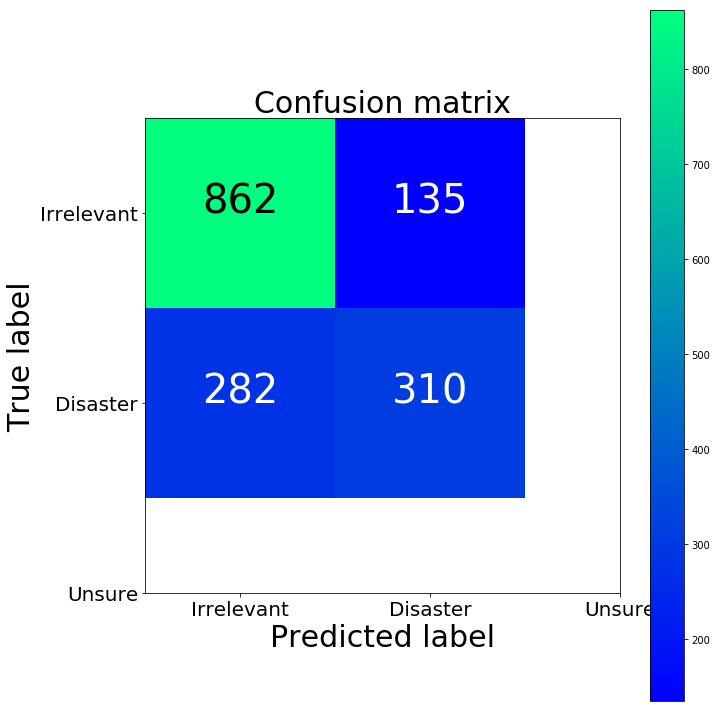

[[862 135]
 [282 310]]


In [40]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [41]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

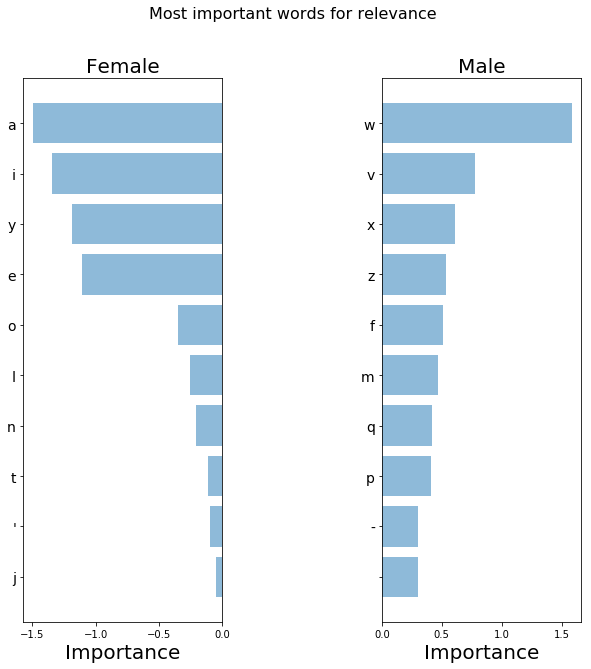

In [42]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Female', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Male', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")


In [43]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(analyzer='char')

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

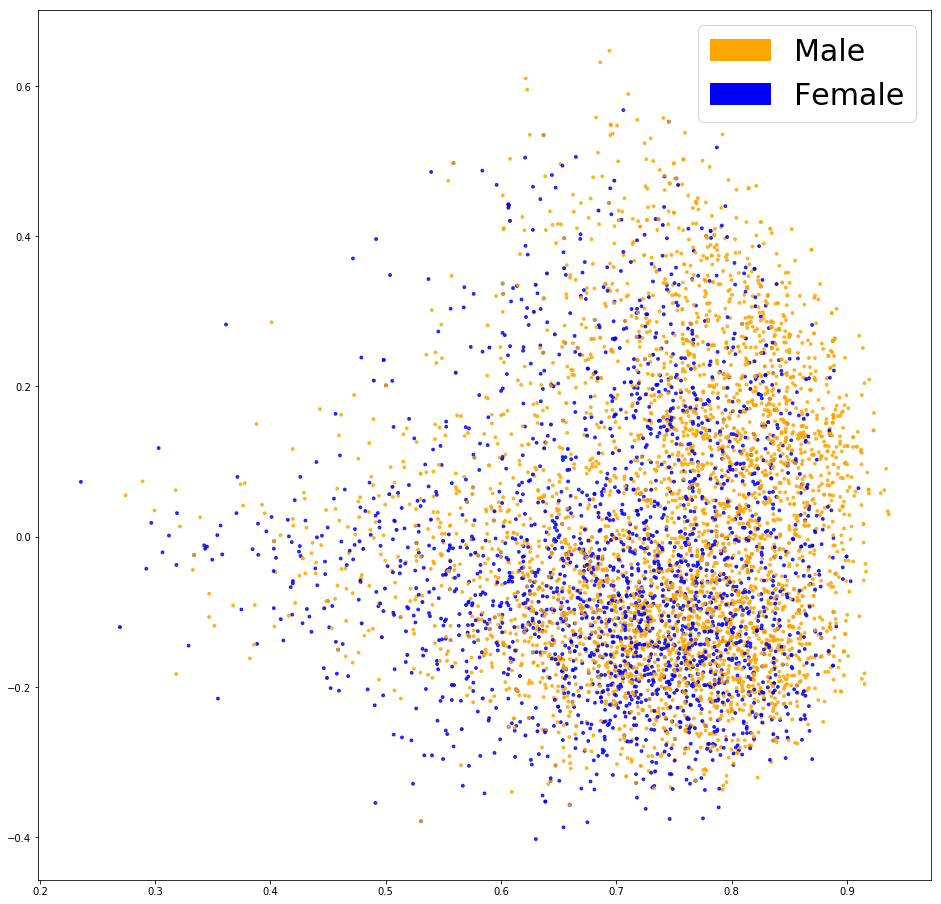

In [44]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [45]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [46]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.725, precision = 0.739, recall = 0.725, f1 = 0.729


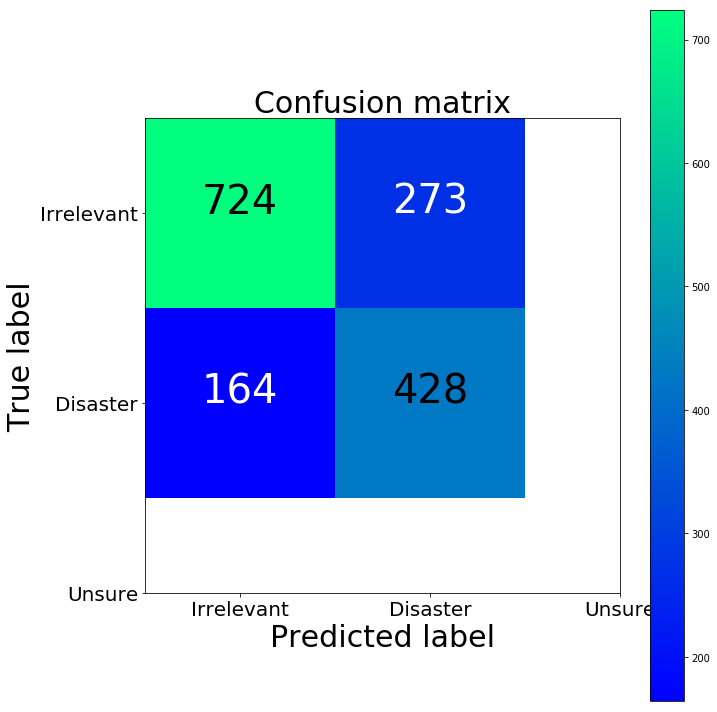

TFIDF confusion matrix
[[724 273]
 [164 428]]
BoW confusion matrix
[[862 135]
 [282 310]]


In [47]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [48]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

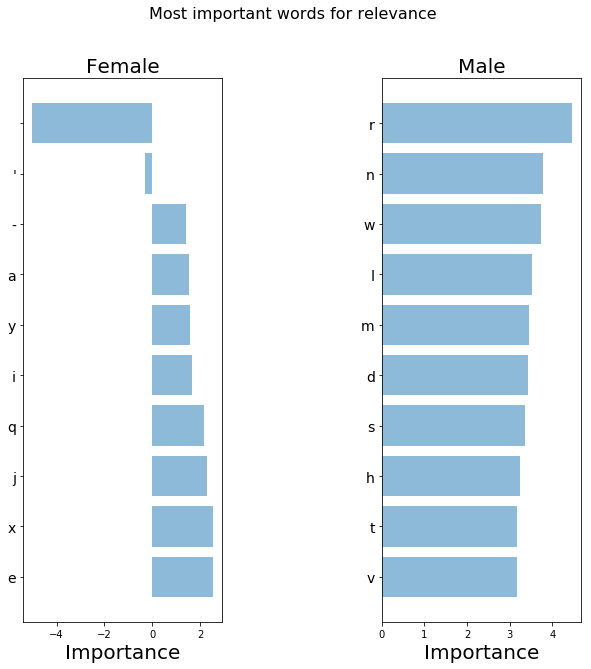

In [215]:
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer(analyzer='char')

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = labeled_names_df["Name"].tolist()
list_labels = labeled_names_df["Sex_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

## Neural Network (Keras)

In [62]:
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

batch_size = 32
epochs = 2 # was 5

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


print('Vectorizing sequence data...')

print('x_train shape:', X_train_counts.shape)
print('x_test shape:', X_test_counts.shape)

2 classes
Vectorizing sequence data...
x_train shape: (6355, 29)
x_test shape: (1589, 29)


In [63]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (6355, 2)
y_test shape: (1589, 2)


In [73]:
print('Building model...')

model = Sequential() #The Sequential model is a linear stack of layers. 
model.add(Dense(256, input_shape=(29,)))
#model.add(Dense(512, input_shape=(max_words,)))

#model.add(Activation('sigmoid')) #very slow to train -- compare ETAs on 500 words sigmoid has ETA: 1:44:28 
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


Building model...


In [74]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [75]:
history = model.fit(X_train_counts, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 5719 samples, validate on 636 samples
Epoch 1/2
5719/5719 [==============================] - 1s 180us/step - loss: 0.6315 - acc: 0.6503 - val_loss: 0.5726 - val_acc: 0.6887
Epoch 2/2
5719/5719 [==============================] - 0s 77us/step - loss: 0.5682 - acc: 0.7115 - val_loss: 0.5550 - val_acc: 0.7075


In [77]:
score = model.evaluate(X_test_counts, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1589/1589 [==============================] - 0s 39us/step
Test score: 0.5426332223070276
Test accuracy: 0.7312775331146691


## Word2Vec

In [218]:
import gensim

word2vec_path = "../input/GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: '../input/GoogleNews-vectors-negative300.bin.gz'

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
embeddings = get_word2vec_embeddings(word2vec, clean_questions)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [ ]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [ ]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

In [ ]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

## Further inspection
Since our model does not use a vector with one dimension per word, it gets much harder to directly see which words are most relevant to our classification. In order to provide some explainability, we can leverage a black box explainer such as LIME.

In [ ]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [ ]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["irrelevant","relevant", "unknown"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [ ]:
visualize_one_exp(X_test_data, y_test_data, 65)

In [ ]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Irrelevant',
    1: 'Relevant',
    2: 'Unsure'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

In [ ]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['Relevant']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['Relevant']['supporters'][:10].tolist()
bottom_words = sorted_contributions['Relevant']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['Relevant']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")


## Leveraging text structure
Our models have been performing better, but they completely ignore the structure. To see whether capturing some more sense of structure would help, we will try a final, more complex model.

## CNNs for text classification
Here, we will be using a Convolutional Neural Network for sentence classification. While not as popular as RNNs, they have been proven to get competitive results (sometimes beating the best models), and are very fast to train, making them a perfect choice for this tutorial.

First, let's embed our text!

In [219]:
labeled_names_df

,Name,Sex,tokens,Sex_label
0,J u s t i n,female,"[J, u, s, t, i, n]",0
1,R a f a e l,male,"[R, a, f, a, e, l]",1
2,G u n t h e r,male,"[G, u, n, t, h, e, r]",1
3,G o n z a l ...,male,"[G, o, n, z, a, l, e, s]",1
4,R a y s h e ...,female,"[R, a, y, s, h, e, l, l]",0
5,X i m e n e z,male,"[X, i, m, e, n, e, z]",1
6,T a b o r,male,"[T, a, b, o, r]",1
7,A l i,female,"[A, l, i]",0
8,H e r m i o ...,female,"[H, e, r, m, i, o, n, e]",0
9,T i f f,female,"[T, i, f, f]",0


In [220]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical



EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(labeled_names_df["Name"].tolist())
sequences = tokenizer.texts_to_sequences(labeled_names_df["Name"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(labeled_names_df["Sex_label"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 27 unique tokens.


NameError: name 'word2vec' is not defined

Now, we will define a simple Convolutional Neural Network

In [ ]:
from keras.layers import Dense, Input, Flatten, Dropout, Merge
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Merge(mode='concat', concat_axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

Now let's train our Neural Network

In [ ]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(clean_questions["class_label"].unique())), False)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

In [ ]:
#Generate featureset: in the form [({'first_last': 'koorB'}, 'male'), ({'first_last': 'enelhtaC'}, 'female'), ...]

#A list of tuples, with index0 = dictionary object of {'feat_lable': feature} and index1 = label (i.e., 'male' or 'female')

In [103]:
def bigram_machine(name):
    bigrams = list(nltk.bigrams(name))
    return {'bigrams': bigrams}

#Trial:

bigram_machine('Tony')

{'bigrams': [('T', 'o'), ('o', 'n'), ('n', 'y')]}

In [104]:
import nltk
from nltk import NaiveBayesClassifier

# Extract the features using the `gender_features()` function.
featuresets = [(bigram_machine(name), gender) for (name, gender) in labeled_names]

# Split the dataset into train and test set.
train_set, test_set = featuresets[500:], featuresets[:500]

# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

TypeError: unhashable type: 'list'

In [100]:
bigram_machine(name):
    bigrams = list(nltk.bigrams(name))
    return {'bigrams': bigrams}
    
# bigrams = nltk.bigrams()

# print('bigrams60', list(bigrams)[0:60])
# bigrams = nltk.bigrams(text)

# cfd = nltk.ConditionalFreqDist(bigrams)

# def generate_model(cfdist, word, num=15):
#    for i in range(num):
#        print(word, end=' ')
#        word = cfdist[word].max()
      
# print('model of living: ')
# generate_model(cfd, 'living', 20)

# print('\n\nmodel of and: ')
# generate_model(cfd, 'and', 200)

# def generate_random_model(cfdist, word, num=15):
#     for i in range(num):
#         print(word, end=' ')
#         mc3 = cfd[word].most_common()[0:3]
#         word = random.choice(mc3)[0]
        
# print('model of living: ')
# generate_random_model(cfd, 'living', 140)

[('J', 'u'), ('u', 's'), ('s', 't'), ('t', 'i'), ('i', 'n')]
[('R', 'a'), ('a', 'f'), ('f', 'a'), ('a', 'e'), ('e', 'l')]
[('G', 'u'), ('u', 'n'), ('n', 't'), ('t', 'h'), ('h', 'e'), ('e', 'r')]
[('G', 'o'), ('o', 'n'), ('n', 'z'), ('z', 'a'), ('a', 'l'), ('l', 'e'), ('e', 's')]
[('R', 'a'), ('a', 'y'), ('y', 's'), ('s', 'h'), ('h', 'e'), ('e', 'l'), ('l', 'l')]
[('X', 'i'), ('i', 'm'), ('m', 'e'), ('e', 'n'), ('n', 'e'), ('e', 'z')]
[('T', 'a'), ('a', 'b'), ('b', 'o'), ('o', 'r')]
[('A', 'l'), ('l', 'i')]
[('H', 'e'), ('e', 'r'), ('r', 'm'), ('m', 'i'), ('i', 'o'), ('o', 'n'), ('n', 'e')]
[('T', 'i'), ('i', 'f'), ('f', 'f')]
[('N', 'y'), ('y', 's'), ('s', 's'), ('s', 'a')]
[('R', 'a'), ('a', 'f'), ('f', 'e')]
[('M', 'a'), ('a', 'r'), ('r', 'l'), ('l', 'i'), ('i', 'n'), ('n', 'e')]
[('N', 'a'), ('a', 't'), ('t', 'a'), ('a', 'l'), ('l', 'y'), ('y', 'a')]
[('T', 'a'), ('a', 't'), ('t', 'e')]
[('R', 'o'), ('o', 's'), ('s', 'c'), ('c', 'o'), ('o', 'e')]
[('T', 'e'), ('e', 'r'), ('r', 'e'),

[('L', 'e'), ('e', 'e'), ('e', 's'), ('s', 'e')]
[('E', 'l'), ('l', 'v'), ('v', 'i'), ('i', 'n')]
[('T', 'i'), ('i', 'p'), ('p', 'h'), ('h', 'a'), ('a', 'n'), ('n', 'y')]
[('Z', 'a'), ('a', 'c'), ('c', 'h'), ('h', 'a'), ('a', 'r'), ('r', 'i'), ('i', 'a')]
[('T', 'a'), ('a', 'n'), ('n', 'a')]
[('A', 'l'), ('l', 'i'), ('i', 'c')]
[('A', 'r'), ('r', 'y'), ('y', 'n')]
[('I', 'r'), ('r', 'i'), ('i', 'n'), ('n', 'a')]
[('C', 'h'), ('h', 'r'), ('r', 'i'), ('i', 's'), ('s', 's')]
[('W', 'i'), ('i', 'l'), ('l', 'o'), ('o', 'n'), ('n', 'e')]
[('O', 'd'), ('d', 'i'), ('i', 'n')]
[('B', 'a'), ('a', 'y'), ('y', 'a'), ('a', 'r'), ('r', 'd')]
[('V', 'e'), ('e', 'r'), ('r', 'o'), ('o', 'n'), ('n', 'i'), ('i', 'k'), ('k', 'e')]
[('A', 'l'), ('l', 'i'), ('i', 'c'), ('c', 'e')]
[('B', 'a'), ('a', 'x'), ('x', 't'), ('t', 'e'), ('e', 'r')]
[('R', 'e'), ('e', 'e'), ('e', 'v'), ('v', 'a')]
[('T', 'r'), ('r', 'e'), ('e', 'm'), ('m', 'a'), ('a', 'i'), ('i', 'n'), ('n', 'e')]
[('W', 'i'), ('i', 'n'), ('n', 'i')

[('N', 'o'), ('o', 'v'), ('v', 'a')]
[('K', 'o'), ('o', 'u'), ('u', 'r'), ('r', 't'), ('t', 'n'), ('n', 'e'), ('e', 'y')]
[('C', 'a'), ('a', 'r'), ('r', 'o'), ('o', 'l'), ('l', 'y'), ('y', 'n'), ('n', 'n')]
[('J', 'e'), ('e', 'a'), ('a', 'n'), ('n', '-'), ('-', 'L'), ('L', 'u'), ('u', 'c')]
[('I', 's'), ('s', 'm'), ('m', 'a'), ('a', 'i'), ('i', 'l')]
[('D', 'o'), ('o', 'r'), ('r', 'i'), ('i', 'e')]
[('H', 'e'), ('e', 's'), ('s', 't'), ('t', 'e'), ('e', 'r')]
[('W', 'a'), ('a', 'l'), ('l', 'd'), ('d', 'e'), ('e', 'm'), ('m', 'a'), ('a', 'r')]
[('R', 'a'), ('a', 'c'), ('c', 'h'), ('h', 'e'), ('e', 'l'), ('l', 'e')]
[('F', 'l'), ('l', 'o'), ('o', 'r'), ('r', 'e'), ('e', 't'), ('t', 't'), ('t', 'e')]
[('A', 'd'), ('d', 'r'), ('r', 'i'), ('i', 'e'), ('e', 'n')]
[('K', 'a'), ('a', 'r'), ('r', 'l')]
[('S', 'h'), ('h', 'e'), ('e', 'r'), ('r', 'i'), ('i', 'l'), ('l', 'l')]
[('C', 'o'), ('o', 'r'), ('r', 'i'), ('i', 's'), ('s', 's'), ('s', 'a')]
[('G', 'u'), ('u', 's')]
[('K', 'e'), ('e', 'r'), 

[('J', 'e'), ('e', 'r'), ('r', 'e'), ('e', 'm'), ('m', 'e')]
[('T', 'i'), ('i', 'l'), ('l', 'e'), ('e', 'r')]
[('T', 'r'), ('r', 'i'), ('i', 'c'), ('c', 'i'), ('i', 'a')]
[('C', 'a'), ('a', 'r'), ('r', 'l'), ('l', 'e'), ('e', 'y')]
[('R', 'o'), ('o', 's'), ('s', 'i'), ('i', 't'), ('t', 'a')]
[('O', 's'), ('s', 'b'), ('b', 'o'), ('o', 'u'), ('u', 'r'), ('r', 'n'), ('n', 'e')]
[('R', 'i'), ('i', 'k'), ('k', 'k'), ('k', 'i')]
[('Q', 'u'), ('u', 'i'), ('i', 'l'), ('l', 'l'), ('l', 'a'), ('a', 'n')]
[('G', 'r'), ('r', 'a'), ('a', 'c'), ('c', 'i'), ('i', 'a')]
[('A', 'r'), ('r', 'a'), ('a', 'b'), ('b', 'e'), ('e', 'l')]
[('P', 'a'), ('a', 'd'), ('d', 'd'), ('d', 'i'), ('i', 'e')]
[('E', 'm'), ('m', 'm'), ('m', 'a'), ('a', 'l'), ('l', 'y'), ('y', 'n'), ('n', 'n'), ('n', 'e')]
[('N', 'a'), ('a', 'n')]
[('T', 'h'), ('h', 'a'), ('a', 'l'), ('l', 'i'), ('i', 'a')]
[('W', 'i'), ('i', 'l'), ('l', 'l'), ('l', 'i')]
[('G', 'u'), ('u', 's'), ('s', 't'), ('t', 'i')]
[('D', 'o'), ('o', 'r'), ('r', 'o'),

[('S', 'i'), ('i', 'n'), ('n', 'd'), ('d', 'e'), ('e', 'e')]
[('J', 'a'), ('a', 'n'), ('n', 'k'), ('k', 'a')]
[('A', 'n'), ('n', 'd'), ('d', 'y')]
[('T', 'r'), ('r', 'a'), ('a', 'c'), ('c', 'i'), ('i', 'e')]
[('T', 'h'), ('h', 'a'), ('a', 'd'), ('d', 'e'), ('e', 'u'), ('u', 's')]
[('B', 'i'), ('i', 's'), ('s', 'h'), ('h', 'o'), ('o', 'p')]
[('C', 'a'), ('a', 'n'), ('n', 'd'), ('d', 'y')]
[('C', 'o'), ('o', 'r'), ('r', 'i')]
[('R', 'e'), ('e', 't'), ('t', 'h'), ('h', 'a')]
[('W', 'e'), ('e', 'i'), ('i', 'd'), ('d', 'a'), ('a', 'r')]
[('E', 's'), ('s', 't'), ('t', 'r'), ('r', 'e'), ('e', 'l'), ('l', 'l'), ('l', 'a')]
[('F', 'o'), ('o', 'r'), ('r', 's'), ('s', 't'), ('t', 'e'), ('e', 'r')]
[('A', 'l'), ('l', 'p'), ('p', 'h'), ('h', 'o'), ('o', 'n'), ('n', 's'), ('s', 'o')]
[('D', 'y'), ('y', 'l'), ('l', 'a'), ('a', 'n')]
[('O', 't'), ('t', 'i'), ('i', 's')]
[('C', 'o'), ('o', 'n'), ('n', 'n'), ('n', 'y')]
[('A', 'n'), ('n', 'n'), ('n', 'i'), ('i', 'c'), ('c', 'e')]
[('V', 'a'), ('a', 'n')

[('B', 'e'), ('e', 'r'), ('r', 'n'), ('n', 'y')]
[('H', 'e'), ('e', 'z'), ('z', 'e'), ('e', 'k'), ('k', 'i'), ('i', 'a'), ('a', 'h')]
[('B', 'i'), ('i', 'l'), ('l', 'l')]
[('G', 'w'), ('w', 'e'), ('e', 'n'), ('n', 'n'), ('n', 'i'), ('i', 'e')]
[('D', 'a'), ('a', 'r'), ('r', 'l'), ('l', 'i'), ('i', 'n'), ('n', 'e')]
[('C', 'e'), ('e', 'l'), ('l', 'e'), ('e', 's'), ('s', 't'), ('t', 'e')]
[('L', 'e'), ('e', 'l'), ('l', 'a'), ('a', 'n'), ('n', 'd')]
[('B', 'a'), ('a', 'r'), ('r', 'o'), ('o', 'n')]
[('C', 'a'), ('a', 't'), ('t', 'h'), ('h', 'a'), ('a', 'r'), ('r', 'i'), ('i', 'n'), ('n', 'e')]
[('J', 'a'), ('a', 'c'), ('c', 'k')]
[('H', 'o'), ('o', 'r'), ('r', 'a'), ('a', 'c'), ('c', 'i'), ('i', 'o')]
[('A', 'd'), ('d', 'n'), ('n', 'a'), ('a', 'n')]
[('J', 'o'), ('o', 's'), ('s', 'e'), ('e', 'p'), ('p', 'h'), ('h', 'i'), ('i', 'n'), ('n', 'e')]
[('D', 'a'), ('a', 'r'), ('r', 'i')]
[('M', 'i'), ('i', 'g'), ('g', 'u'), ('u', 'e'), ('e', 'l'), ('l', 'a')]
[('T', 'i'), ('i', 'm'), ('m', 'm'), 

In [ ]:
#Neural Network:

import numpy as np
import keras
keras.__version__